In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import json

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

There is indeed some periodicity to the login counts. A 12 hour cycle of peak login counts is evident. We can also see that there is a weekly cycle of peak login counts for two days. This suggests additional weekend activity. Below are plots of various time windows, a list times of the most extreme login counts, and plots of login counts by weekday and hour.

In [2]:
# Load data
file_path = './'

logins_df = pd.read_json(file_path + 'logins.json')

In [3]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Note the timestamps are not unique. This is not necessarily problematic; timestamps are to the nearest second.

In [6]:
duplicates_df = pd.concat(g for _, g in logins_df.groupby('login_time') if len(g) > 1) 
duplicates_df.head()

,login_time
347,1970-01-02 10:59:52
354,1970-01-02 10:59:52
427,1970-01-02 12:27:48
434,1970-01-02 12:27:48
503,1970-01-02 15:08:27


In [7]:
logins_df['aggregate'] = 1
logins_df = logins_df.set_index('login_time')

In [8]:
logins_resample_df = logins_df.resample('15min').count()

In [9]:
logins_resample_df.head()

,aggregate
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
logins_resample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
aggregate    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [11]:
logins_resample_df.describe()

,aggregate
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


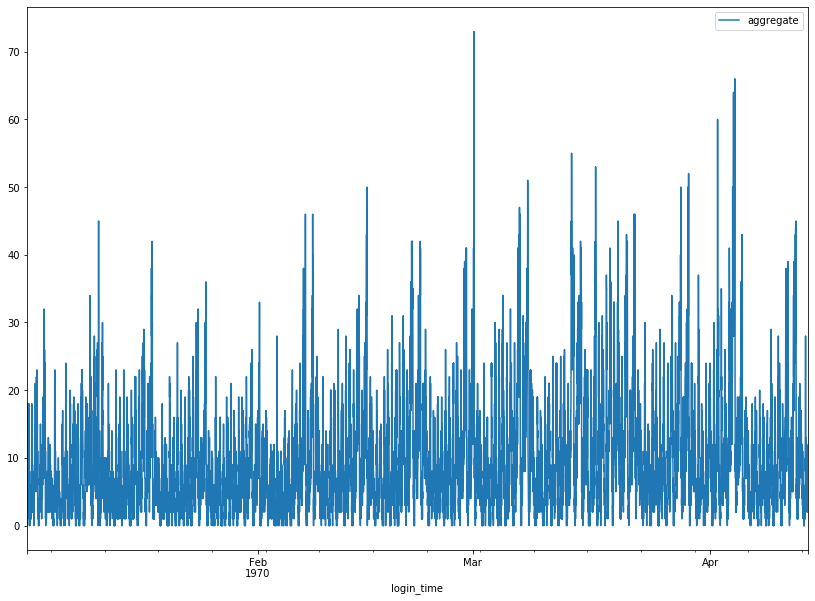

In [12]:
# Full plot
logins_resample_df.plot(figsize=(14,10))
plt.show()

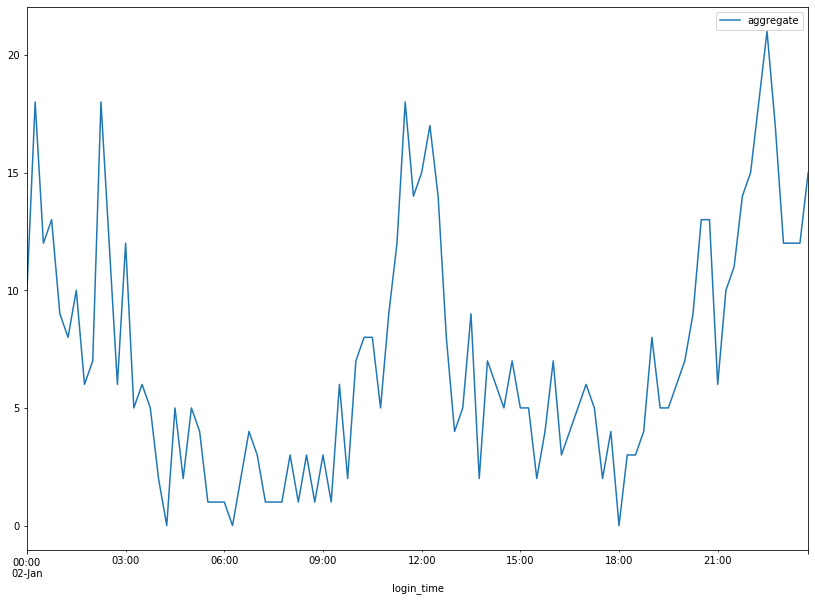

In [13]:
# First full day
logins_resample_df.loc['02-Jan-1970'].plot(figsize=(14,10))
plt.show()

In [14]:
# Set a random date for a few plots
random_date = logins_resample_df.sample().index.date[0]

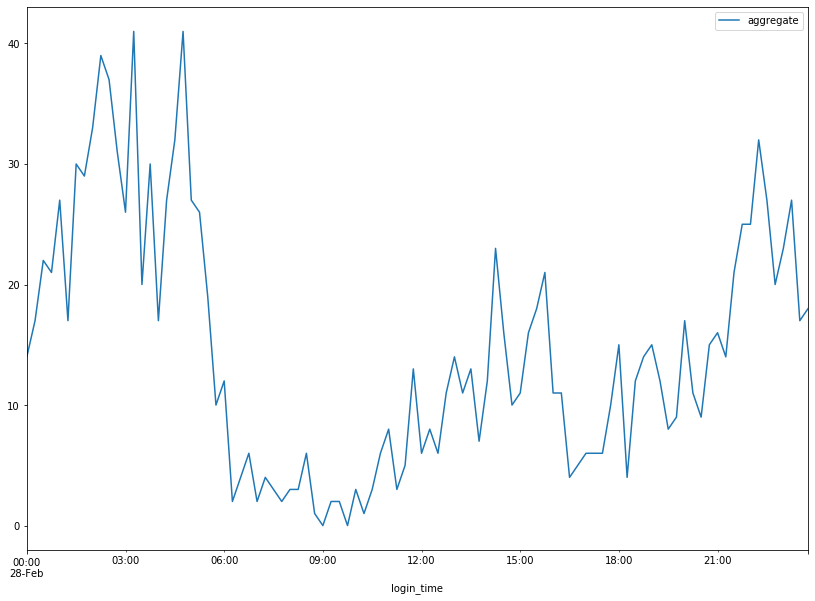

In [15]:
# Arbitary day
logins_resample_df[str(random_date)].plot(figsize=(14,10))
plt.show()

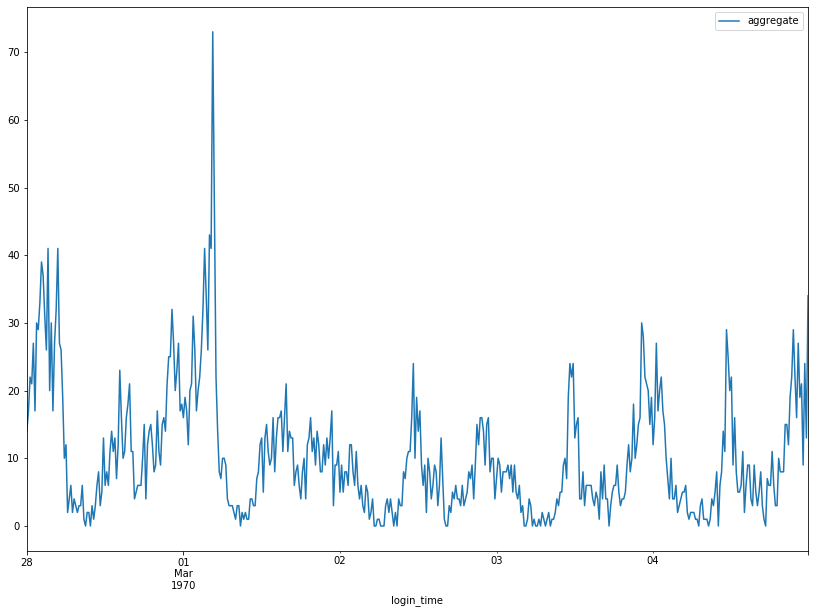

In [16]:
# Multiday
logins_resample_df[str(random_date):str(random_date +
                       datetime.timedelta(days=4))].plot(figsize=(14, 10))
plt.show()

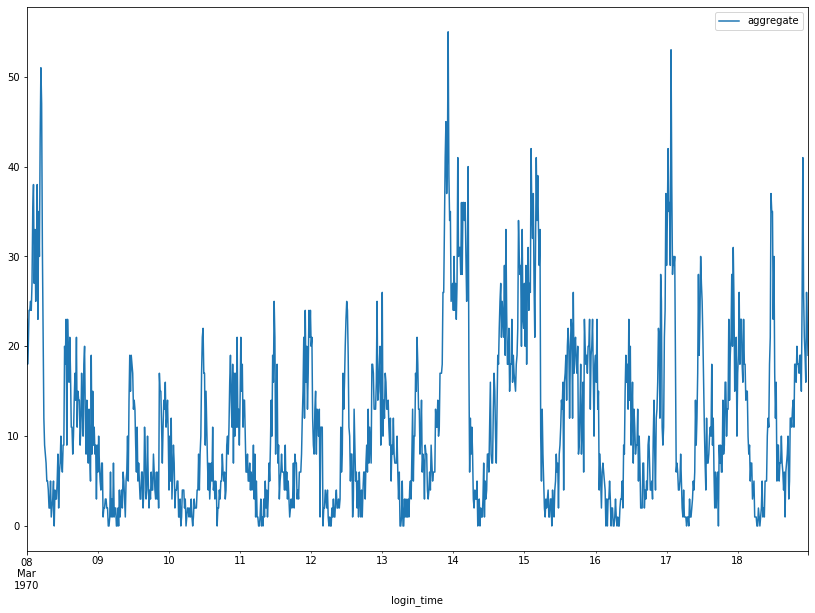

In [17]:
# Arbitrary 10 day
logins_resample_df.loc['08-Mar-1970':'18-Mar-1970'].plot(figsize=(14,10))
plt.show()

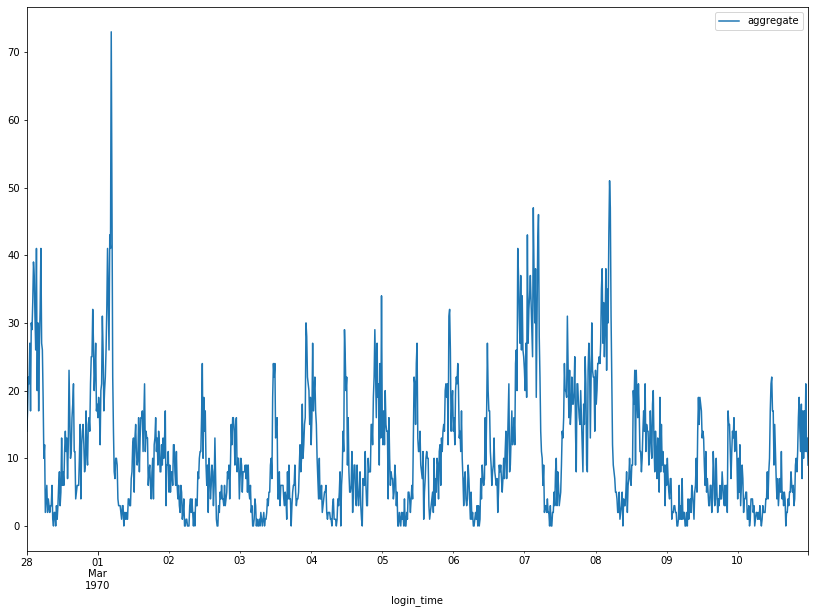

In [18]:
# 10-day
logins_resample_df.loc[str(random_date):str(random_date +
                       datetime.timedelta(days=10))].plot(figsize=(14, 10))
plt.show()

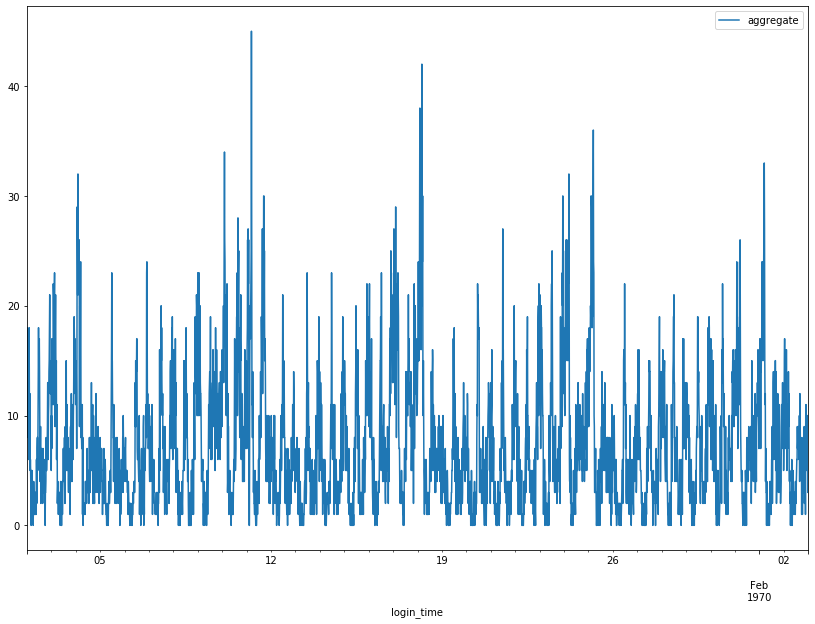

In [19]:
# First month
logins_resample_df.loc['02-Jan-1970':'02-Feb-1970'].plot(figsize=(14,10))
plt.show()

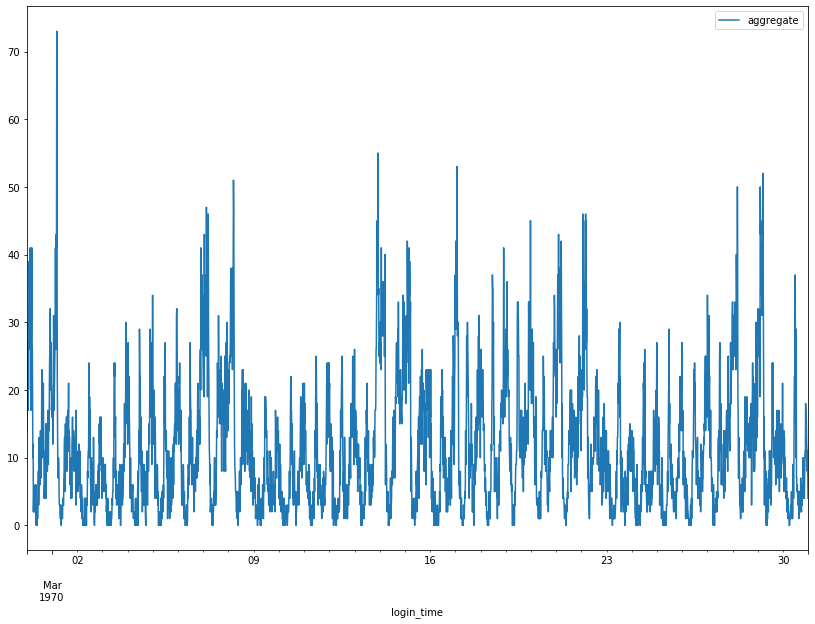

In [20]:
# Random Month
logins_resample_df.loc[str(random_date):str(random_date +
                       datetime.timedelta(days=30))].plot(figsize=(14, 10))
plt.show()

In [21]:
# Top login counts
logins_resample_df[logins_resample_df['aggregate'] >= 40].head(15)

,aggregate
login_time,
1970-01-11 04:45:00,45
1970-01-18 04:15:00,42
1970-02-07 04:30:00,46
1970-02-08 03:15:00,46
1970-02-08 04:45:00,40
1970-02-15 04:00:00,43
1970-02-15 04:30:00,40
1970-02-15 04:45:00,50
1970-02-21 01:15:00,42


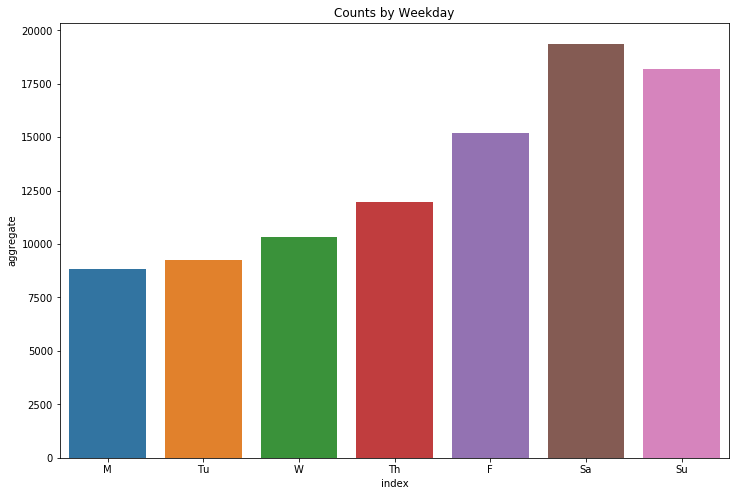

In [22]:
logins_resample_df['weekday'] = logins_resample_df.index.weekday

weekday_counts = logins_resample_df.groupby('weekday').sum()
weekday_counts.index = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']
plt.figure(figsize=(12,8))
sns.barplot(x='index', y='aggregate', data=weekday_counts.reset_index())
plt.title('Counts by Weekday')
plt.show()

In [23]:
logins_resample_df = logins_resample_df.drop('weekday', axis=1)

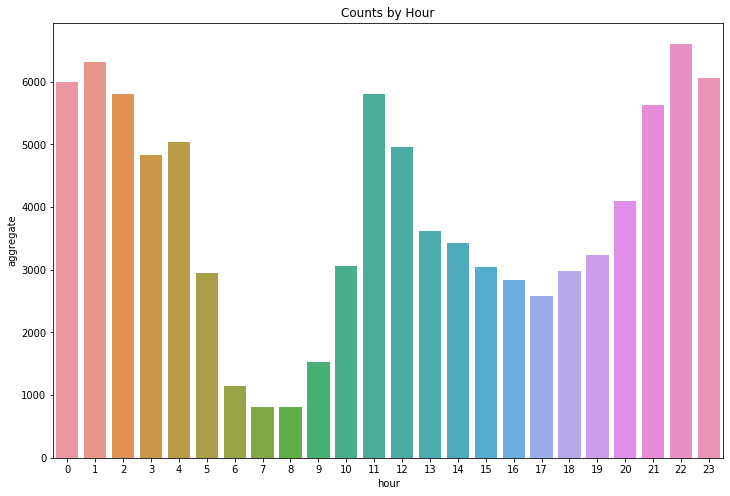

In [24]:
logins_resample_df['hour'] = logins_resample_df.index.hour

hour_counts = logins_resample_df.groupby('hour').sum()
plt.figure(figsize=(12,8))
sns.barplot(x='hour', y='aggregate', data=hour_counts.reset_index())
plt.title('Counts by Hour')
plt.show()

# Part II - Experiments and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the
observation
    3. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. As the key measure of success consider ratios of drivers to passengers in each Gotham and Metropolis. Our goal is to provide a larger pool of drivers to passengers and allow drivers to move between cities with less friction thereby increasing satisfaction and revenue. If the ratio of drivers to passengers is equal in each city, then at least to first order we minimize the friction for drivers and passengers to connect.

2. 
    1. Assuming we have access to the GPS data, we can aggregate the amount of time each drivers spend in each city to find a proportion $p_\text{driver}$ of time all drivers spend in one of the cites, say, Gotham. In addition, we may want to account for variables like the population of each city, geographic area, traffic, etc. This is more direct description of the variable we want to measure although we could use proxies, e.g. reimbursements. We should collect data both before and after the reimbursements begin.
    2. We can structure a hypothesis test as follows. Given the ratio of passenger pick-up locations in, say, Gotham, $p_\text{passenger}$, if $p_\text{driver} < p_\text{passenger}$, that is, Gotham residents are underserved, then we should construct a one-tailed $z$-test with the hypotheses:
        * $H_0$: $p_{\text{driver}_0} \geq p_{\text{driver}_1}$
        * $H_1$: $p_{\text{driver}_0} < p_{\text{driver}_1}$
    
    where $p_{\text{driver}_0}$ is without reimbursement and $p_{\text{driver}_1}$ is with. A level of significance $\alpha = 0.05$ would be appropriate for this experiment.
    3. If in fact this improves the agreement between the proportions of drivers and passengers it would be a good policy to consider as long as we have performed a cost-benefit analysis by additionally constructing an experiment to assess the impact on revenues.

# Part III - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


## Data Cleaning and Exploration
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [25]:
# Pandas pd.read_json() no-go
df = pd.DataFrame(data=json.load(open('ultimate_data_challenge.json')))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [27]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [28]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

df.city = df.city.astype('category')
df.phone = df.phone.astype('category')

/Users/i/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/i/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


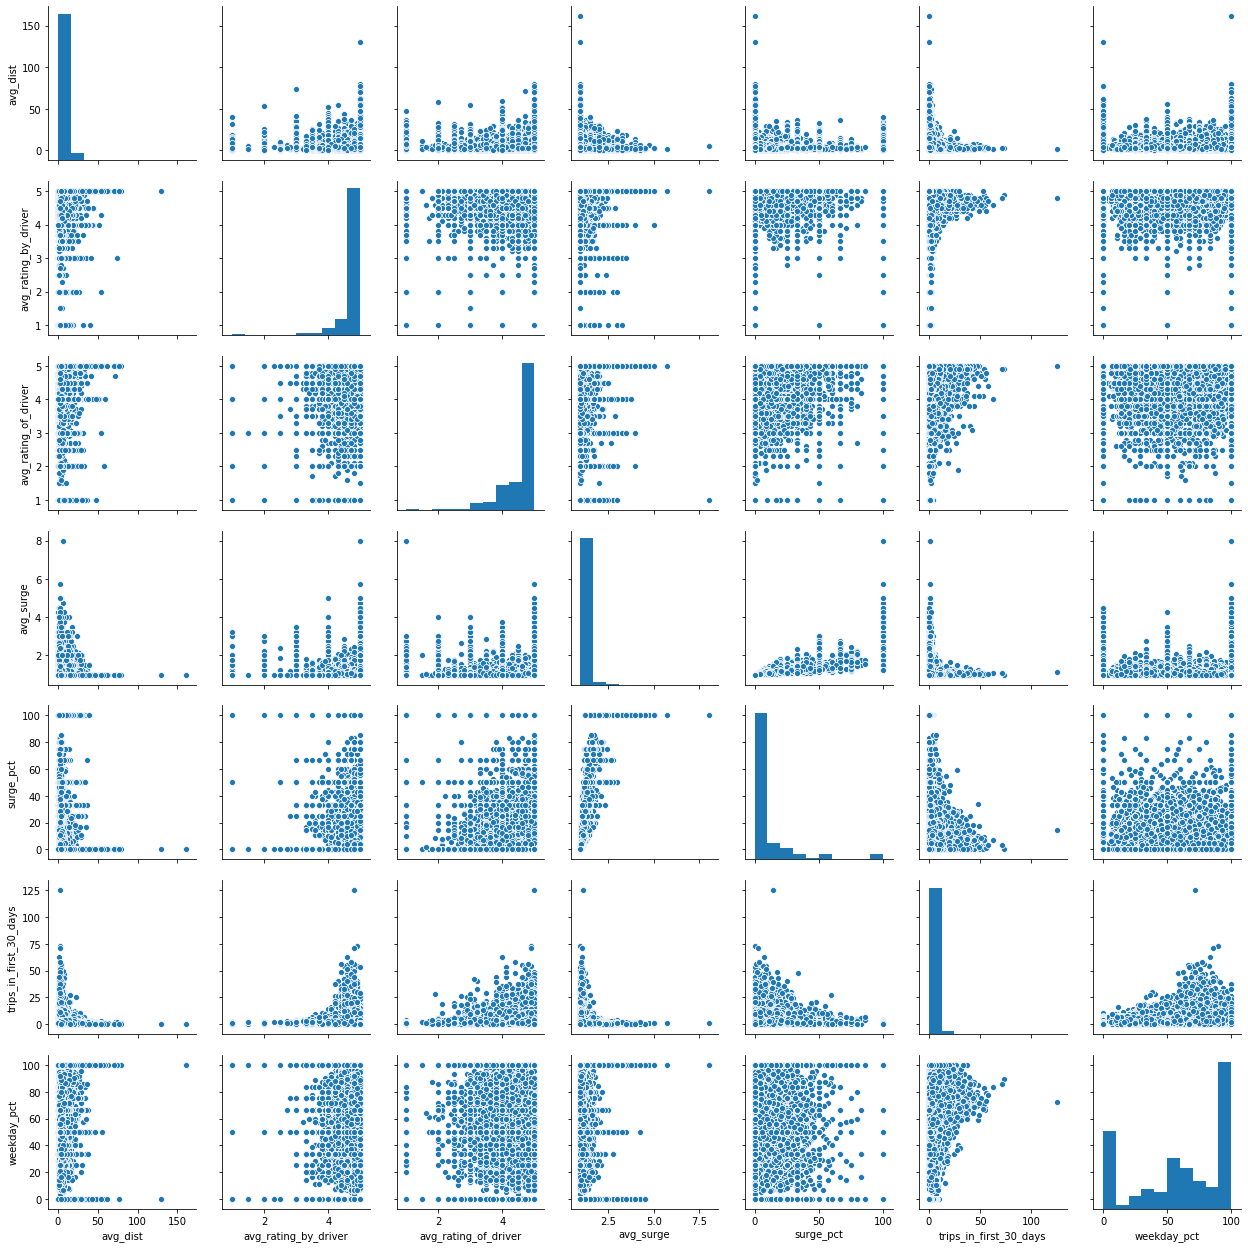

In [29]:
sns.pairplot(data=df.drop('ultimate_black_user', axis=1))
plt.show()

In [30]:
start_date = min(df['last_trip_date'])
end_date = max(df['last_trip_date'])

In [31]:
start_date

Timestamp('2014-01-01 00:00:00')

In [32]:
# Define dependent variable

previous_30_days = pd.date_range(end=end_date, periods=30, freq='D')
df['active'] = df['last_trip_date'].apply(lambda x: x in previous_30_days)

In [33]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


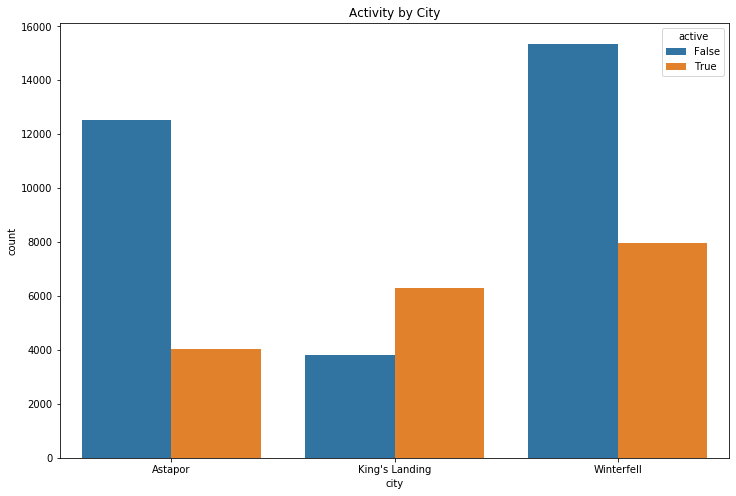

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x='city', hue='active', data=df)
plt.title('Activity by City')
plt.show()

We should examine why King's Landing retains so many users and how we can imrove retention in Astapor especially.

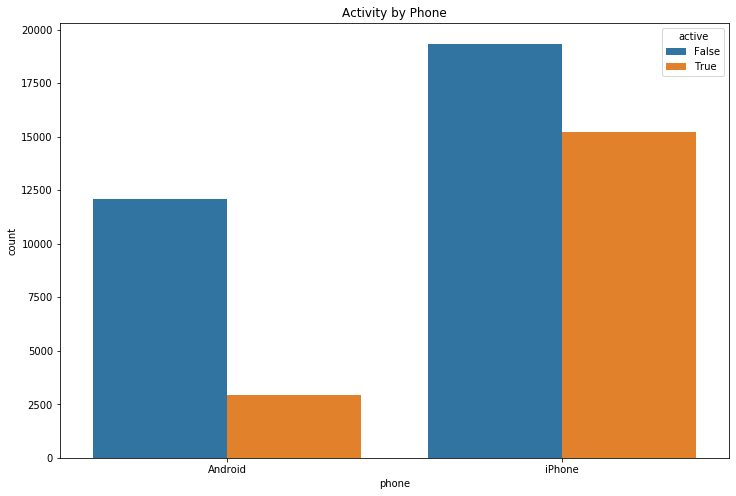

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='phone', hue='active', data=df)
plt.title('Activity by Phone')
plt.show()

Perhaps the Android app is not providing the same user experience as the iPhone app. This seems like too large a discrepancy to explain via demographic differences.

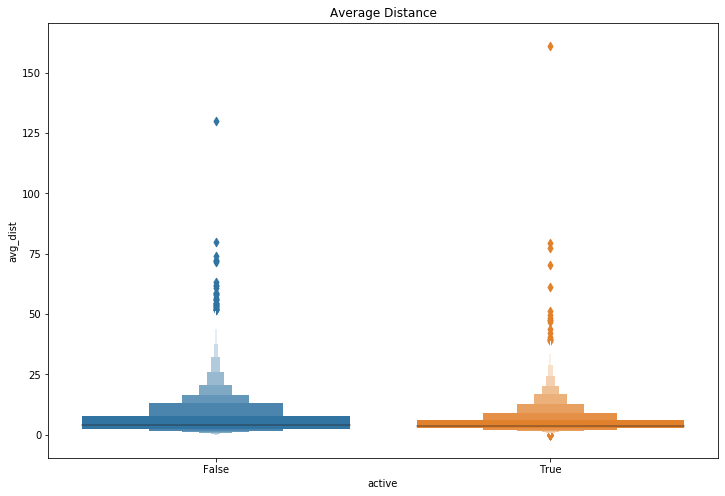

In [36]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df, y='avg_dist', x='active')
plt.title('Average Distance')
plt.show()

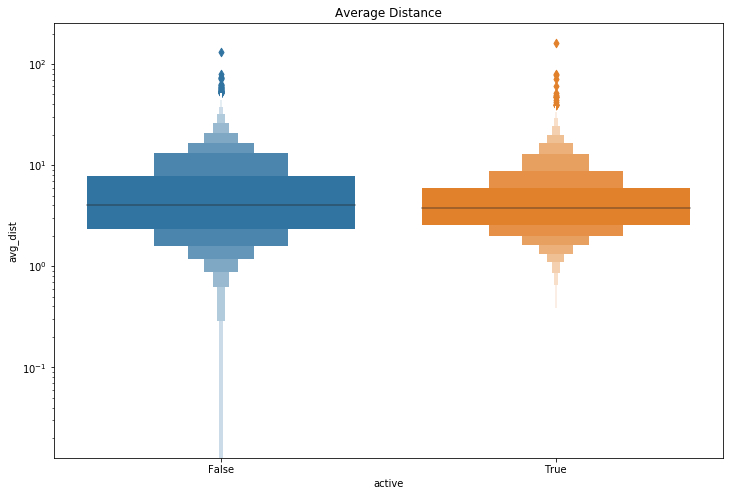

In [37]:
plt.figure(figsize=(12,8))
g = sns.boxenplot(data=df, y='avg_dist', x='active')
g.set(yscale="log")
plt.title('Average Distance')
plt.show()

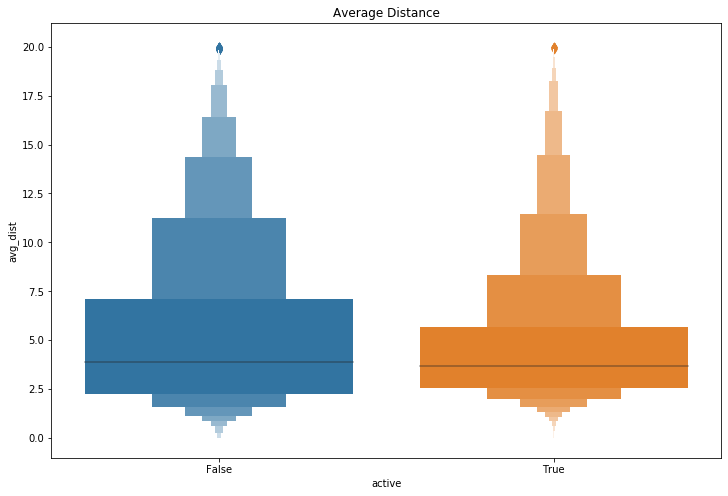

In [38]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df[df['avg_dist'] <= 20], y='avg_dist', x='active')
plt.title('Average Distance')
plt.show()

Active users are taking somewhat shorter trips.

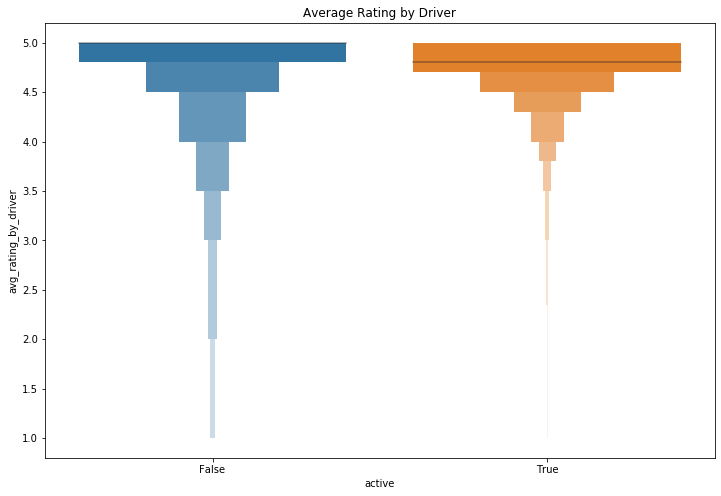

In [39]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df, y='avg_rating_by_driver', x='active')
plt.title('Average Rating by Driver')
plt.show()

There are more inactive passengers who are poorly rated.

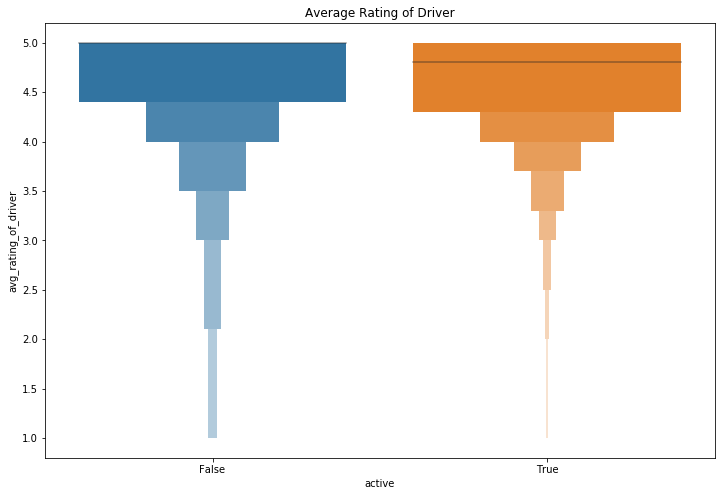

In [40]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df, y='avg_rating_of_driver', x='active')
plt.title('Average Rating of Driver')
plt.show()

Again, more of those passengers who are inactive had poor experiences with their drivers.

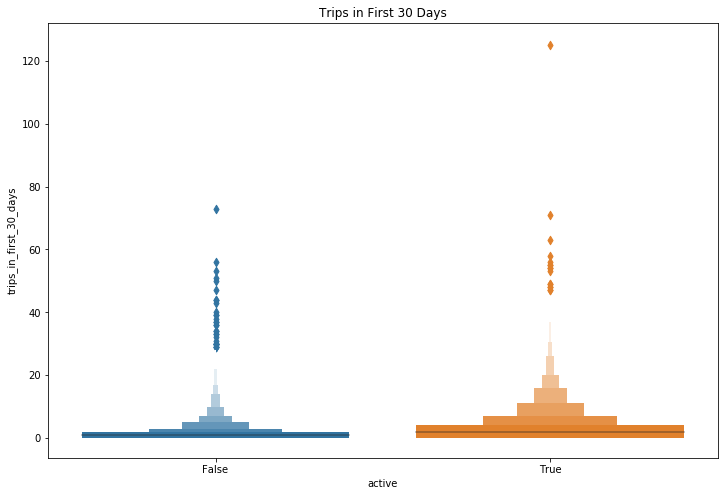

In [41]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df, y='trips_in_first_30_days', x='active')
plt.title('Trips in First 30 Days')
plt.show()

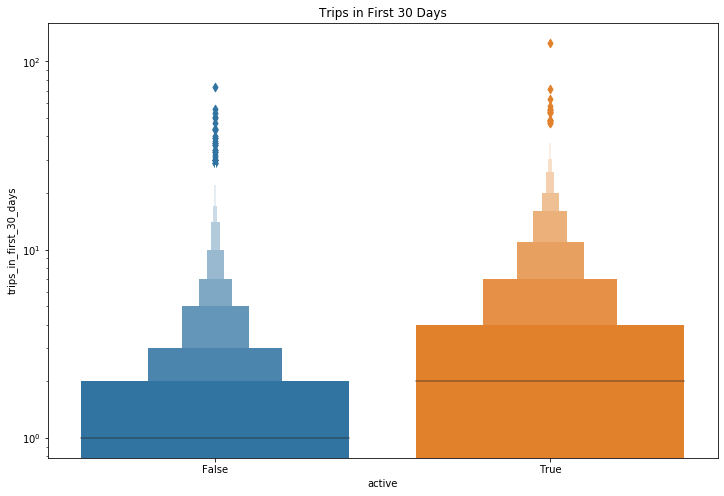

In [42]:
plt.figure(figsize=(12,8))
g = sns.boxenplot(data=df, y='trips_in_first_30_days', x='active')
g.set(yscale="log")
plt.title('Trips in First 30 Days')
plt.show()

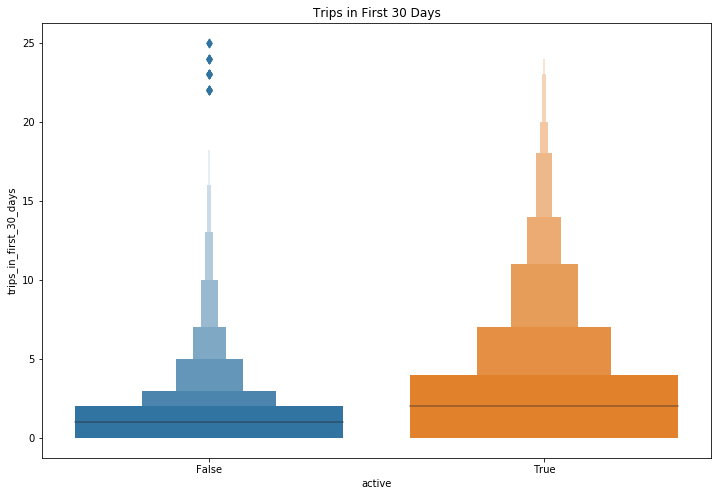

In [43]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df[df['trips_in_first_30_days'] <= 25], y='trips_in_first_30_days', x='active')
plt.title('Trips in First 30 Days')
plt.show()

Users who are still active tended to use the service much more often in the first 30 days.

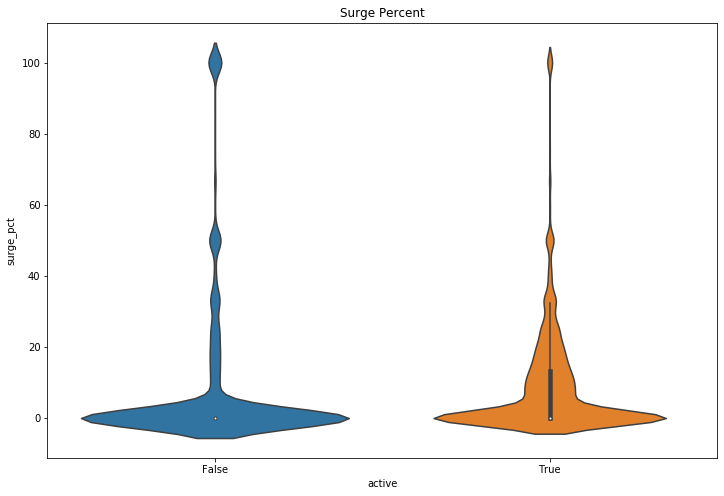

In [44]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='active', y='surge_pct')
plt.title('Surge Percent')
plt.show()

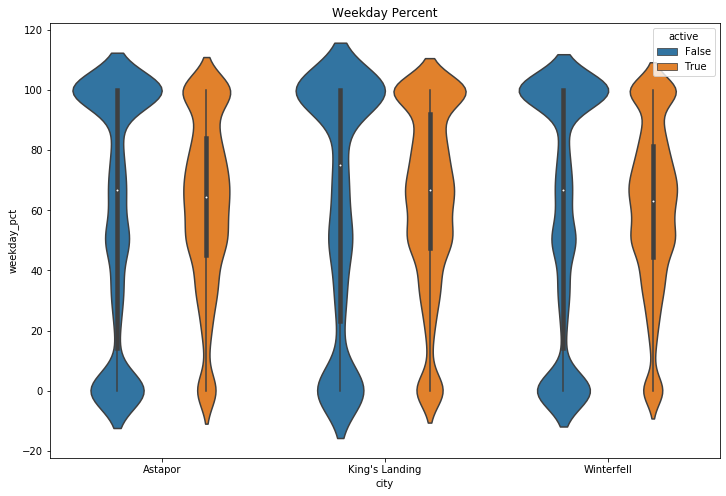

In [45]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, hue='active', y='weekday_pct', x='city')
plt.title('Weekday Percent')
plt.show()

In [46]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [47]:
# Convert categoricals
df = (df.join(pd.get_dummies(df.city, drop_first=False)).join(
    pd.get_dummies(df.phone, drop_first=False)).drop(['city', 'phone'], axis=1))

In [48]:
# Impute mean for NaNs in avg_*
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(
    df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(
    df['avg_rating_of_driver'].mean())

In [49]:
# Convert signup_date to int
df['days_since_signup'] = (end_date - df['signup_date']).dt.days
df = df.drop('signup_date', axis=1)

In [50]:
# Drop last_trip_date, it's a transform of the dependent variable
df = df.drop('last_trip_date', axis=1)

In [51]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,days_since_signup
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,True,0,1,0,0,1,157
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,False,1,0,0,1,0,153
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,False,1,0,0,0,1,176
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,True,0,1,0,0,1,172
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,False,0,0,1,1,0,155


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
df.drop('active', axis=1), df.active, test_size=0.3)

In [56]:
# Cross-validation for GBC
gbc = GradientBoostingClassifier(n_estimators=250)
params = {'learning_rate': np.linspace(0.05, 0.25, 5)}
clf = GridSearchCV(gbc, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_ 

{'learning_rate': 0.2}

In [57]:
# Train gbc on best params
gbc = GradientBoostingClassifier(n_estimators=250,
                             learning_rate=0.20)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.7917333333333333

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=gbc.predict(X_test)))

              precision    recall  f1-score   support

       False       0.82      0.87      0.84      9525
        True       0.74      0.66      0.70      5475

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.77     15000
weighted avg       0.79      0.79      0.79     15000



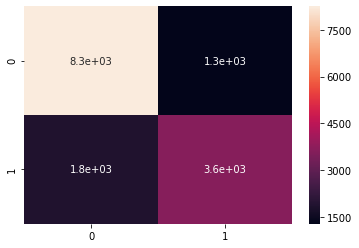

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=gbc.predict(X_test)), annot=True)
plt.show()

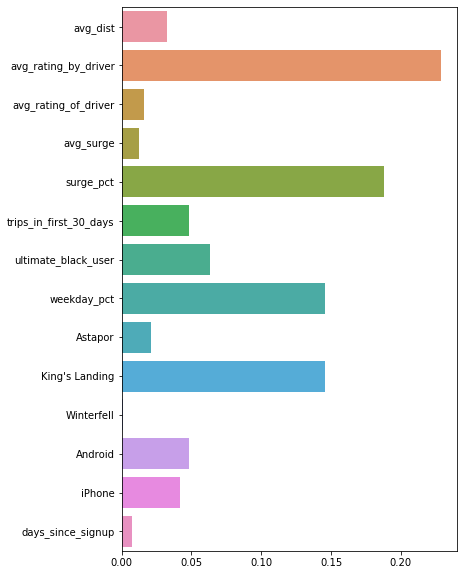

In [60]:
plt.figure(figsize=(6,10))
sns.barplot(y=df.drop('active', axis=1).columns, x=gbc.feature_importances_)
plt.show()

The classifier performs quite well at 79% accuracy. 

## Recommendations

`avg_rating_by_driver`, `surge_pct`, `weekday_pct`, and `King's Landing` are the most important features for our classifier. Generally, iPhone users and King's Landing users are more likely to remain active. We should study the characteristics of these populations. Those with a greater `surge_pct` are less active. Users with a greater `weekday_pct` are often active as well. It may be that heavier regular users like commuters remain active while those who more often use surge pricing, perhaps irregular or late-night users, are more often inactive. We should explore retention plans for Astapor and Winterfell users, examine the performance of the Android app, and consider marketing for heavier surge and irregular users.